# Signal processing

In [1]:
import numpy as np
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, lfilter
import features as ft
from scipy.signal import freqz
import datetime
from scipy.stats import norm

In [2]:
# Set the working directory to the location of the data files
os.chdir("C:\\Users\\javie\\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\\MaestriaEnCienciaDeDatos\\EstanciaDeInvestigacion\\Popocatepelt\\PopocatepetlVolcano\\data")
# os.chdir("D:/Popocatepetl/data/clean_data/2023")

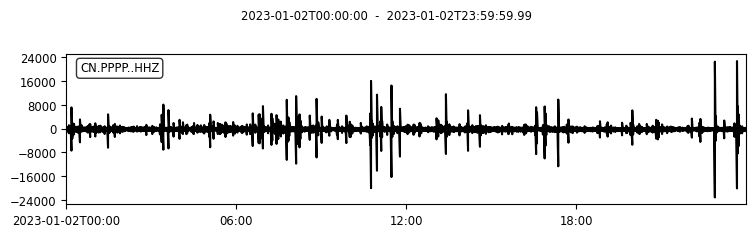

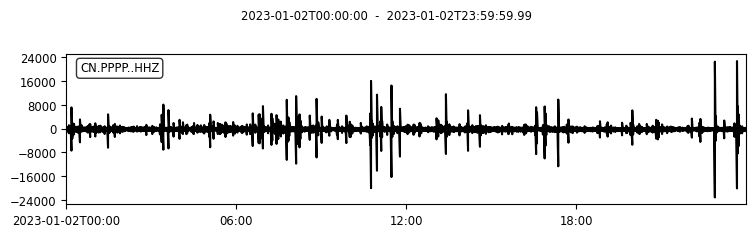

In [3]:
# We select a day with high volcanic activity
st = read("CN_PPPP_HHZ_2023_01_02.seed")
st.plot()

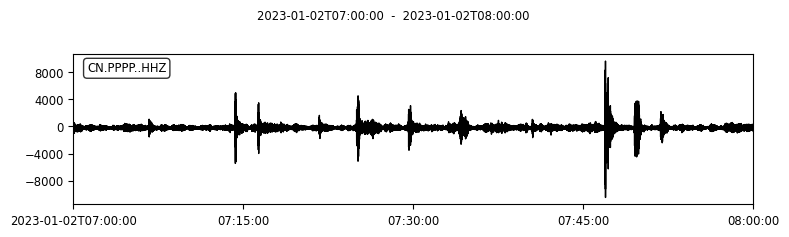

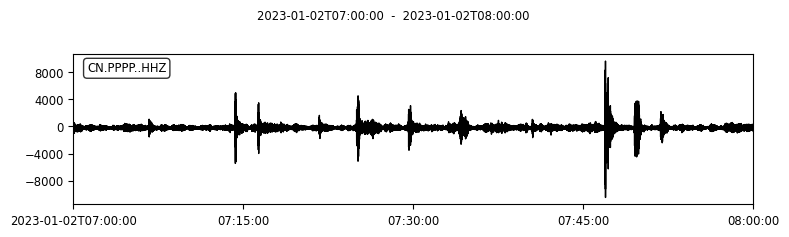

In [4]:
# Extracting a 1-hour segment
t0 = st[0].stats.starttime
ti = 7
tf = 8
hour = st.slice(t0+3600*ti, t0+3600*tf)
hour.plot()

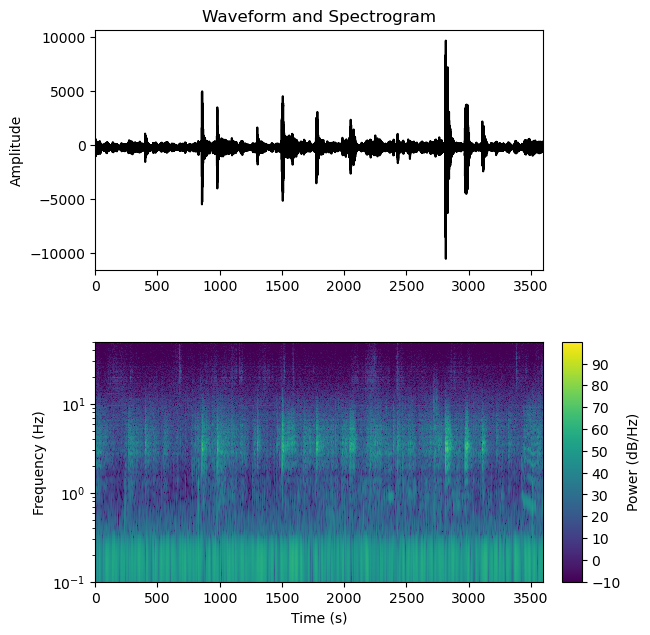

In [5]:
# Waveform and spectrogram graph
ft.plot_signal(hour[0])

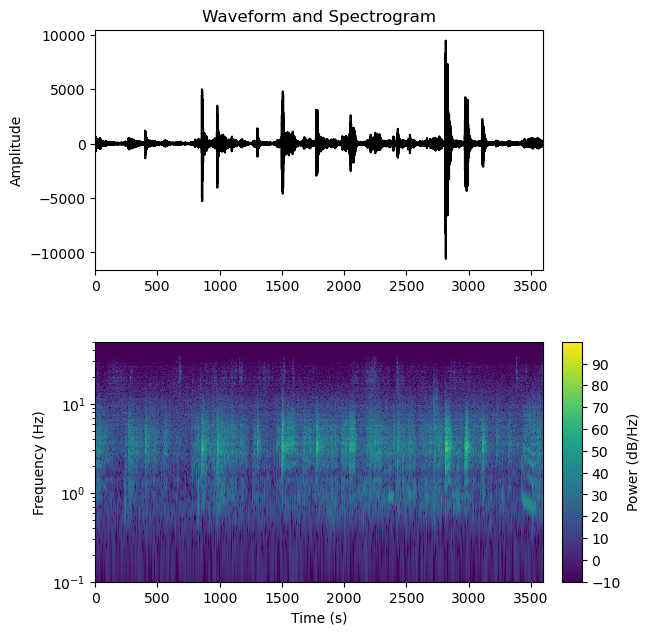

In [6]:
[filtered_signal, s_low, s_high] = ft.load_and_preprocess_seismic_data("CN_PPPP_HHZ_2023_01_02.seed")
filtered_signal = filtered_signal.slice(t0+3600*ti, t0+3600*tf)
s_low = s_low.slice(t0+3600*ti, t0+3600*tf)
s_high = s_high.slice(t0+3600*ti, t0+3600*tf)
# Waveform and spectrogram graph
ft.plot_signal(filtered_signal[0])

In [7]:
# Example usage:
# Assuming you have a trace object called 'trace'
features_df = ft.calculate_features(filtered_signal[0], s_low[0], s_high[0], window_size_seconds=600, overlap=0.5)

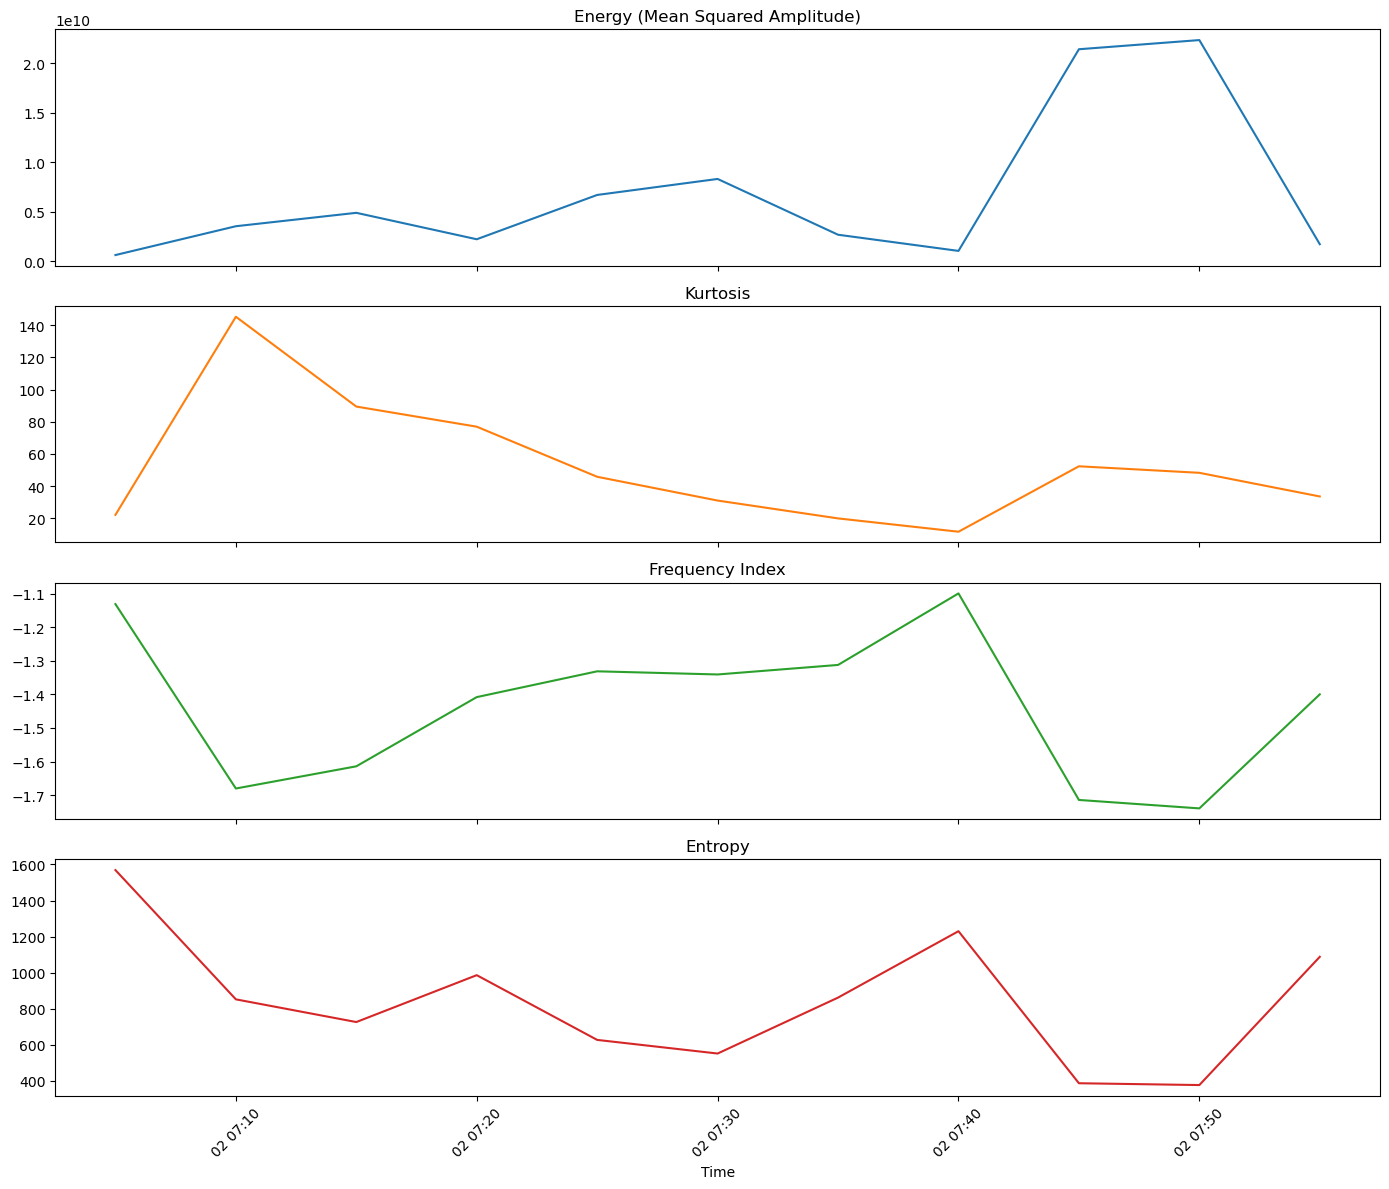

In [8]:
# Plot all four statistical features in separate subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)

axes[0].plot(features_df['timestamp'], features_df['energy'], color='tab:blue')
axes[0].set_title('Energy (Mean Squared Amplitude)')

axes[1].plot(features_df['timestamp'], features_df['kurtosis'], color='tab:orange')
axes[1].set_title('Kurtosis')

axes[2].plot(features_df['timestamp'], features_df['frequency_index'], color='tab:green')
axes[2].set_title('Frequency Index')

axes[3].plot(features_df['timestamp'], features_df['entropy'], color='tab:red')
axes[3].set_title('Entropy')
axes[3].set_xlabel('Time')

plt.xticks(rotation=45)
plt.tight_layout()